In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("../data/train.csv")
df2 = pd.read_csv("../data/test.csv")

In [3]:
df.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

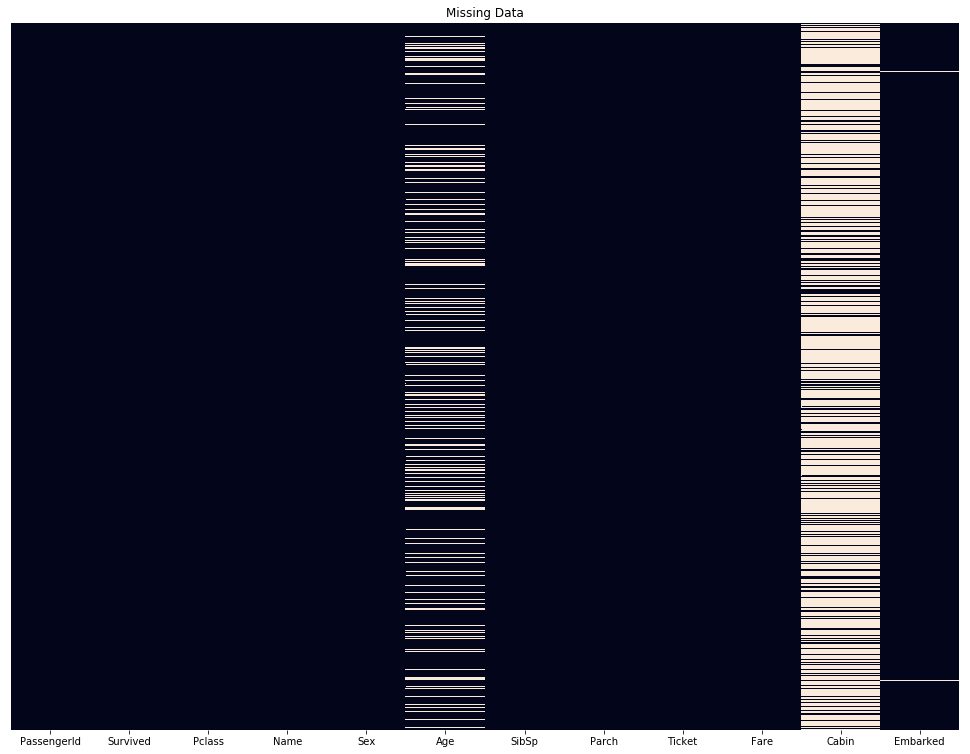

In [4]:
plt.figure(figsize=(17,13))
ax = sns.heatmap(df.isna(),cbar=False);
ax.set_yticks([]);
ax.set_title('Missing Data');

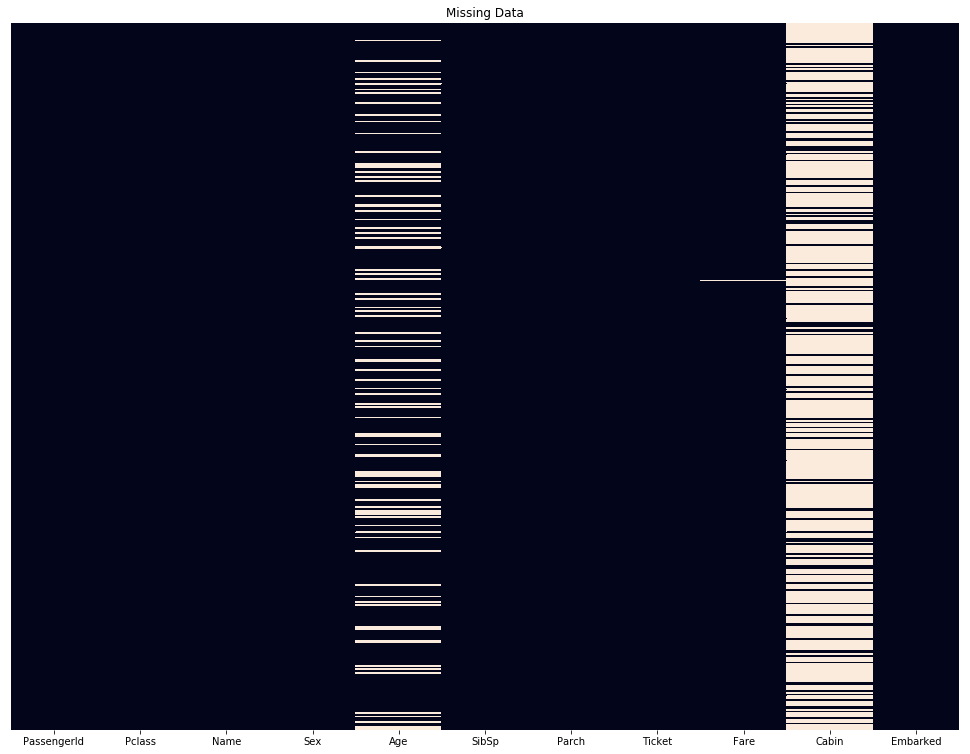

In [5]:
plt.figure(figsize=(17,13))
ax2 = sns.heatmap(df2.isna(),cbar=False);
ax2.set_yticks([]);
ax2.set_title('Missing Data');

In [6]:
df[df['Embarked'].isna()]

PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN

In [7]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
df['Embarked'].value_counts().plot.pie()

In [9]:
# Fills with mode where 'Embarked' equals NaN

df['Embarked'].fillna(df.Embarked.mode()[0], inplace=True)

In [10]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [11]:
df.Fare.mode()

0    8.05
dtype: float64

In [12]:
classes = df.Pclass.unique()

In [13]:
classes.sort()
classes

array([1, 2, 3], dtype=int64)

In [14]:
class_fare = pd.DataFrame()
for clas in classes:
    class_fare[clas] = df[df.Pclass == clas].Fare.describe()
class_fare = class_fare.T
class_fare

count       mean        std  min       25%      50%   75%       max
1  216.0  84.154687  78.380373  0.0  30.92395  60.2875  93.5  512.3292
2  184.0  20.662183  13.417399  0.0  13.00000  14.2500  26.0   73.5000
3  491.0  13.675550  11.778142  0.0   7.75000   8.0500  15.5   69.5500

In [15]:
class_fare.loc[1, 'mean']

84.15468749999992

In [16]:
for i in df[df['Fare'].isna()].index:
    df.iloc[i, 8] = class_fare.loc[df.iloc[i, 1], 'mean']    

In [17]:
titulo = re.compile(r'\b[a-zA-Z]+\b\.')
def title(full_name):
    x = re.search(titulo, full_name)
    return x.group()

In [18]:
def correct_name(full_name):
    if '(' in full_name:
        x = re.search(r'(?<=[\(])(?P<nome>[\W\w]+)(?=[\)])', full_name)
        #x = re.search(r'(?<=[\(])(?P<nome>[\"\.\-\w\s]+)(?=[\)])', full_name)
        return x.group('nome')
    else:
        surname = re.search(r'^(?P<sobrenome>[\W\w]+)(?=[\,])', full_name)
        name = re.search(r'(?:\b[a-zA-Z]+\b\.\s)(?P<nome>[^\(][\w\W]+)', full_name)
        #surname = re.search(r'^(?P<sobrenome>[\'\-\w\s]+)(?=[\,])', full_name)
        #name = re.search(r'(?:\b[a-zA-Z]+\b\.\s)(?P<nome>[\w\s\"]+)', full_name)
        return name.group('nome') + ' ' + surname.group('sobrenome')

In [19]:
def family_name(full_name):
    x = re.search(r'^.+(?=[\,])', full_name)
    return x.group()

In [20]:
def family_nickname(full_name):
    x = re.search(r'(?<=\.\s).*?(?= \(|$)', full_name)
    return x.group()

In [21]:
df['Title'] = df['Name'].apply(title)

In [22]:
df['Person'] = df['Name'].apply(correct_name)

In [23]:
df['FamilyName'] = df['Name'].apply(family_name)

In [24]:
df['FamilyNickname'] = df['Name'].apply(family_nickname)

In [25]:
df.Ticket.is_unique

False

In [26]:
df['Has_Family_Onboard'] = np.where((df['Parch']>0) | (df['SibSp']>0), 1, 0)

In [27]:
loners = df[df['Has_Family_Onboard'] == 0]

In [28]:
df.Has_Family_Onboard.corr(df.Survived)

0.2033670856998922

In [29]:
df['Title'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.',
       'Countess.', 'Jonkheer.'], dtype=object)

In [30]:
df[df['Title'].str.contains('Rev.')]

PassengerId  Survived  Pclass                               Name   Sex  \
149          150         0       2  Byles, Rev. Thomas Roussel Davids  male   
150          151         0       2         Bateman, Rev. Robert James  male   
249          250         0       2      Carter, Rev. Ernest Courtenay  male   
626          627         0       2     Kirkland, Rev. Charles Leonard  male   
848          849         0       2                  Harper, Rev. John  male   
886          887         0       2              Montvila, Rev. Juozas  male   

      Age  SibSp  Parch       Ticket    Fare Cabin Embarked Title  \
149  42.0      0      0       244310  13.000   NaN        S  Rev.   
150  51.0      0      0  S.O.P. 1166  12.525   NaN        S  Rev.   
249  54.0      1      0       244252  26.000   NaN        S  Rev.   
626  57.0      0      0       219533  12.350   NaN        Q  Rev.   
848  28.0      0      1       248727  33.000   NaN        S  Rev.   
886  27.0      0      0       211536  13.000   NaN        S  Rev.   

                          Person FamilyName         FamilyNickname  \
149  Thomas Roussel Davids Byles      Byles  Thomas Roussel Davids   
150         Robert James Bateman    Bateman           Robert James   
249      Ernest Courtenay Carter     Carter       Ernest Courtenay   
626     Charles Leonard Kirkland   Kirkland        Charles Leonard   
848                  John Harper     Harper                   John   
886              Juozas Montvila   Montvila                 Juozas   

     Has_Family_Onboard  
149                   0  
150                   0  
249                   1  
626                   0  
848                   1  
886                   0

In [31]:
df[df['Name'].str.contains('Maioni')]

PassengerId  Survived  Pclass                   Name     Sex   Age  \
504          505         1       1  Maioni, Miss. Roberta  female  16.0   

     SibSp  Parch  Ticket  Fare Cabin Embarked  Title          Person  \
504      0      0  110152  86.5   B79        S  Miss.  Roberta Maioni   

    FamilyName FamilyNickname  Has_Family_Onboard  
504     Maioni        Roberta                   0

In [32]:
df[df['Title'] == 'Dr.'].Survived.value_counts()

0    4
1    3
Name: Survived, dtype: int64

In [33]:
def family(fname):
    return df[df['Name'].str.contains(fname)].values, df2[df2['Name'].str.contains(fname)].values

In [34]:
family('Carter')

(array([[250, 0, 2, 'Carter, Rev. Ernest Courtenay', 'male', 54.0, 1, 0,
         '244252', 26.0, nan, 'S', 'Rev.', 'Ernest Courtenay Carter',
         'Carter', 'Ernest Courtenay', 1],
        [391, 1, 1, 'Carter, Mr. William Ernest', 'male', 36.0, 1, 2,
         '113760', 120.0, 'B96 B98', 'S', 'Mr.', 'William Ernest Carter',
         'Carter', 'William Ernest', 1],
        [436, 1, 1, 'Carter, Miss. Lucile Polk', 'female', 14.0, 1, 2,
         '113760', 120.0, 'B96 B98', 'S', 'Miss.', 'Lucile Polk Carter',
         'Carter', 'Lucile Polk', 1],
        [764, 1, 1, 'Carter, Mrs. William Ernest (Lucile Polk)', 'female',
         36.0, 1, 2, '113760', 120.0, 'B96 B98', 'S', 'Mrs.',
         'Lucile Polk', 'Carter', 'William Ernest', 1],
        [803, 1, 1, 'Carter, Master. William Thornton II', 'male', 11.0,
         1, 2, '113760', 120.0, 'B96 B98', 'S', 'Master.',
         'William Thornton II Carter', 'Carter', 'William Thornton II', 1],
        [855, 0, 2, 'Carter, Mrs. Ernest Court

In [35]:
underaged = df[df.Age < 16]
underaged['Title'].value_counts()

Miss.      41
Master.    36
Mr.         4
Mrs.        2
Name: Title, dtype: int64

In [36]:
families = df[['Name'.split(',')[0], 'Ticket', 'PassengerId', 'SibSp', 'Parch']].copy()

In [37]:
def surname(x):
    return(x.split(',')[0])

In [38]:
families.loc[:, 'Name'] = families.loc[:, 'Name'].apply(surname)
families

Name            Ticket  PassengerId  SibSp  Parch
0             Braund         A/5 21171            1      1      0
1            Cumings          PC 17599            2      1      0
2          Heikkinen  STON/O2. 3101282            3      0      0
3           Futrelle            113803            4      1      0
4              Allen            373450            5      0      0
5              Moran            330877            6      0      0
6           McCarthy             17463            7      0      0
7            Palsson            349909            8      3      1
8            Johnson            347742            9      0      2
9             Nasser            237736           10      1      0
10         Sandstrom           PP 9549           11      1      1
11           Bonnell            113783           12      0      0
12       Saundercock         A/5. 2151           13      0      0
13         Andersson            347082           14      1      5
14           Vestrom            350406           15      0      0
15           Hewlett            248706           16      0      0
16              Rice            382652           17      4      1
17          Williams            244373           18      0      0
18     Vander Planke            345763           19      1      0
19        Masselmani              2649           20      0      0
20            Fynney            239865           21      0      0
21           Beesley            248698           22      0      0
22           McGowan            330923           23      0      0
23            Sloper            113788           24      0      0
24           Palsson            349909           25      3      1
25           Asplund            347077           26      1      5
26              Emir              2631           27      0      0
27           Fortune             19950           28      3      2
28           O'Dwyer            330959           29      0      0
29          Todoroff            349216           30      0      0
..               ...               ...          ...    ...    ...
861            Giles             28134          862      1      0
862            Swift             17466          863      0      0
863             Sage          CA. 2343          864      8      2
864             Gill            233866          865      0      0
865          Bystrom            236852          866      0      0
866     Duran y More     SC/PARIS 2149          867      1      0
867         Roebling          PC 17590          868      0      0
868    van Melkebeke            345777          869      0      0
869          Johnson            347742          870      1      1
870           Balkic            349248          871      0      0
871         Beckwith             11751          872      1      1
872         Carlsson               695          873      0      0
873  Vander Cruyssen            345765          874      0      0
874          Abelson         P/PP 3381          875      1      0
875            Najib              2667          876      0      0
876       Gustafsson              7534          877      0      0
877          Petroff            349212          878      0      0
878           Laleff            349217          879      0      0
879           Potter             11767          880      0      1
880          Shelley            230433          881      0      1
881           Markun            349257          882      0      0
882         Dahlberg              7552          883      0      0
883         Banfield  C.A./SOTON 34068          884      0      0
884         Sutehall   SOTON/OQ 392076          885      0      0
885             Rice            382652          886      0      5
886         Montvila            211536          887      0      0
887           Graham            112053          888      0      0
888         Johnston        W./C. 6607          889      1      2
889             Behr            111369          890     

In [39]:
families_gb = families.groupby(['Ticket', 'PassengerId'], as_index=False).agg(lambda name: ';'.join(name))

In [40]:
families_gb

Ticket  PassengerId                    Name
0               110152          258                  Cherry
1               110152          505                  Maioni
2               110152          760                  Rothes
3               110413          263                 Taussig
4               110413          559                 Taussig
5               110413          586                 Taussig
6               110465          111                  Porter
7               110465          476                Clifford
8               110564          431  Bjornstrom-Steffansson
9               110813          367                  Warren
10              111240          171            Van der hoef
11              111320          463                     Gee
12              111361          330                 Hippach
13              111361          524                 Hippach
14              111369          890                    Behr
15              111426          605                   Homer
16              111427          508                 Bradley
17              111428          188                 Romaine
18              112050          807                 Andrews
19              112052          634                    Parr
20              112053          888                  Graham
21              112058          816                     Fry
22              112059          264                Harrison
23              112277          210                   Blank
24              112379          767                   Brewe
25              113028          712                  Klaber
26              113043          332                 Partner
27              113050          537                    Butt
28              113051          453                 Foreman
29              113055          858                    Daly
..                 ...          ...                     ...
861  STON/O 2. 3101274          434                  Kallio
862  STON/O 2. 3101275          244                 Maenpaa
863  STON/O 2. 3101280          174                  Sivola
864  STON/O 2. 3101285          665               Lindqvist
865  STON/O 2. 3101286          580                 Jussila
866  STON/O 2. 3101288          745                Stranden
867  STON/O 2. 3101289          401                Niskanen
868  STON/O 2. 3101292          637                Leinonen
869  STON/O 2. 3101293          383                Tikkanen
870  STON/O 2. 3101294          116               Pekoniemi
871   STON/O2. 3101271          730              Ilmakangas
872   STON/O2. 3101279          143             Hakkarainen
873   STON/O2. 3101279          404             Hakkarainen
874   STON/O2. 3101282            3               Heikkinen
875   STON/O2. 3101283          217                Honkanen
876   STON/O2. 3101290          817                Heininen
877          SW/PP 751          227                 Mellors
878        W./C. 14258          527                Ridsdale
879        W./C. 14263          243               Coleridge
880         W./C. 6607          784                Johnston
881         W./C. 6607          889                Johnston
882         W./C. 6608           87                    Ford
883         W./C. 6608          148                    Ford
884         W./C. 6608          437                    Ford
885         W./C. 6608          737                    Ford
886         W./C. 6609          236                Harknett
887        W.E.P. 5734           93                 Chaffee
888          W/C 14208          220                  Harris
889          WE/P 5735          541                  Crosby
890          WE/P 5735          746                  Crosby

[891 rows x 3 columns]

In [41]:
df.info() # Método .info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
PassengerId           891 non-null int64
Survived              891 non-null int64
Pclass                891 non-null int64
Name                  891 non-null object
Sex                   891 non-null object
Age                   714 non-null float64
SibSp                 891 non-null int64
Parch                 891 non-null int64
Ticket                891 non-null object
Fare                  891 non-null float64
Cabin                 204 non-null object
Embarked              891 non-null object
Title                 891 non-null object
Person                891 non-null object
FamilyName            891 non-null object
FamilyNickname        891 non-null object
Has_Family_Onboard    891 non-null int32
dtypes: float64(2), int32(1), int64(5), object(9)
memory usage: 114.9+ KB


In [42]:
df.T.head()

0    \
PassengerId                        1   
Survived                           0   
Pclass                             3   
Name         Braund, Mr. Owen Harris   
Sex                             male   

                                                           1    \
PassengerId                                                  2   
Survived                                                     1   
Pclass                                                       1   
Name         Cumings, Mrs. John Bradley (Florence Briggs Th...   
Sex                                                     female   

                                2    \
PassengerId                       3   
Survived                          1   
Pclass                            3   
Name         Heikkinen, Miss. Laina   
Sex                          female   

                                                      3    \
PassengerId                                             4   
Survived                                                1   
Pclass                                                  1   
Name         Futrelle, Mrs. Jacques Heath (Lily May Peel)   
Sex                                                female   

                                  4                 5    \
PassengerId                         5                 6   
Survived                            0                 0   
Pclass                              3                 3   
Name         Allen, Mr. William Henry  Moran, Mr. James   
Sex                              male              male   

                                 6                               7    \
PassengerId                        7                               8   
Survived                           0                               0   
Pclass                             1                               3   
Name         McCarthy, Mr. Timothy J  Palsson, Master. Gosta Leonard   
Sex                             male                            male   

                                                           8    \
PassengerId                                                  9   
Survived                                                     1   
Pclass                                                       3   
Name         Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)   
Sex                                                     female   

                                             9           ...           \
PassengerId                                   10         ...            
Survived                                       1         ...            
Pclass                                         2         ...            
Name         Nasser, Mrs. Nicholas (Adele Achem)         ...            
Sex                                       female         ...            

                            881                           882  \
PassengerId                 882                           883   
Survived                      0                             0   
Pclass                        3                             3   
Name         Markun, Mr. Johann  Dahlberg, Miss. Gerda Ulrika   
Sex                        male                        female   

                                       883                     884  \
PassengerId                            884                     885   
Survived                                 0                       0   
Pclass                                   2                       3   
Name         Banfield, Mr. Frederick James  Sutehall, Mr. Henry Jr   
Sex                                   male                    male   

                                              885                    886  \
PassengerId                                   886                    887   
Survived                                        0                      0   
Pclass                                          3                      2   
Name         Rice, Mrs. William (Margaret Norton)  Mo

In [43]:
df.dtypes

PassengerId             int64
Survived                int64
Pclass                  int64
Name                   object
Sex                    object
Age                   float64
SibSp                   int64
Parch                   int64
Ticket                 object
Fare                  float64
Cabin                  object
Embarked               object
Title                  object
Person                 object
FamilyName             object
FamilyNickname         object
Has_Family_Onboard      int32
dtype: object

In [44]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'Person',
       'FamilyName', 'FamilyNickname', 'Has_Family_Onboard'],
      dtype='object')

In [45]:
df['Pclass']

0      3
1      1
2      3
3      1
4      3
5      3
6      1
7      3
8      3
9      2
10     3
11     1
12     3
13     3
14     3
15     2
16     3
17     2
18     3
19     3
20     2
21     2
22     3
23     1
24     3
25     3
26     3
27     1
28     3
29     3
      ..
861    2
862    1
863    3
864    2
865    2
866    2
867    1
868    3
869    3
870    3
871    1
872    1
873    3
874    2
875    3
876    3
877    3
878    3
879    1
880    2
881    3
882    3
883    2
884    3
885    3
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [46]:
males_survived = df[(df["Sex"] == "male") & (df["Survived"] == 1)]

In [47]:
df.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [48]:
type(df.Survived)

pandas.core.series.Series

In [49]:
type(df['Survived'])

pandas.core.series.Series

In [50]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [51]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Title  \
0      0         A/5 21171   7.2500   NaN        S    Mr.   
1      0          PC 17599  71.2833   C85        C   Mrs.   
2      0  STON/O2. 3101282   7.9250   NaN        S  Miss.   
3      0            113803  53.1000  C123        S   Mrs.   
4      0            373450   8.0500   NaN        S    Mr.   

                   Person FamilyName FamilyNickname  Has_Family_Onboard  
0      Owen Harris Braund     Braund    Owen Harris                   1  
1  Florence Briggs Thayer    Cumings   John Bradley                   1  
2         Laina Heikkinen  Heikkinen          Laina                   0  
3           Lily May Peel   Futrelle  Jacques Heath                   1  
4     William Henry Allen      Allen  William Henry                   0

In [52]:
df.drop('PassengerId', axis=1, inplace=True)

In [53]:
cats = df[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Title']]

In [54]:
hot = OneHotEncoder(sparse=False)
cats_hot = hot.fit_transform(cats)

In [55]:
cats_hot = pd.DataFrame(cats_hot,columns=hot.get_feature_names())
cats_hot.head()

x0_1  x0_2  x0_3  x1_female  x1_male  x2_0  x2_1  x2_2  x2_3  x2_4  \
0   0.0   0.0   1.0        0.0      1.0   0.0   1.0   0.0   0.0   0.0   
1   1.0   0.0   0.0        1.0      0.0   0.0   1.0   0.0   0.0   0.0   
2   0.0   0.0   1.0        1.0      0.0   1.0   0.0   0.0   0.0   0.0   
3   1.0   0.0   0.0        1.0      0.0   0.0   1.0   0.0   0.0   0.0   
4   0.0   0.0   1.0        0.0      1.0   1.0   0.0   0.0   0.0   0.0   

    ...     x5_Major.  x5_Master.  x5_Miss.  x5_Mlle.  x5_Mme.  x5_Mr.  \
0   ...           0.0         0.0       0.0       0.0      0.0     1.0   
1   ...           0.0         0.0       0.0       0.0      0.0     0.0   
2   ...           0.0         0.0       1.0       0.0      0.0     0.0   
3   ...           0.0         0.0       0.0       0.0      0.0     0.0   
4   ...           0.0         0.0       0.0       0.0      0.0     1.0   

   x5_Mrs.  x5_Ms.  x5_Rev.  x5_Sir.  
0      0.0     0.0      0.0      0.0  
1      1.0     0.0      0.0      0.0  
2      0.0     0.0      0.0      0.0  
3      1.0     0.0      0.0      0.0  
4      0.0     0.0      0.0      0.0  

[5 rows x 39 columns]

In [56]:
df = df.merge(cats_hot,how='left',on=df.index)

In [57]:
df.head()

key_0  Survived  Pclass                                               Name  \
0      0         0       3                            Braund, Mr. Owen Harris   
1      1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2      2         1       3                             Heikkinen, Miss. Laina   
3      3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4      4         0       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare   ...    x5_Major.  \
0    male  22.0      1      0         A/5 21171   7.2500   ...          0.0   
1  female  38.0      1      0          PC 17599  71.2833   ...          0.0   
2  female  26.0      0      0  STON/O2. 3101282   7.9250   ...          0.0   
3  female  35.0      1      0            113803  53.1000   ...          0.0   
4    male  35.0      0      0            373450   8.0500   ...          0.0   

  x5_Master. x5_Miss. x5_Mlle. x5_Mme. x5_Mr.  x5_Mrs.  x5_Ms.  x5_Rev.  \
0        0.0      0.0      0.0     0.0    1.0      0.0     0.0      0.0   
1        0.0      0.0      0.0     0.0    0.0      1.0     0.0      0.0   
2        0.0      1.0      0.0     0.0    0.0      0.0     0.0      0.0   
3        0.0      0.0      0.0     0.0    0.0      1.0     0.0      0.0   
4        0.0      0.0      0.0     0.0    1.0      0.0     0.0      0.0   

   x5_Sir.  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  

[5 rows x 56 columns]

In [58]:
df.drop(['key_0','Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Title', 'Person'],axis=1,inplace=True)

In [59]:
df.drop(['FamilyName', 'FamilyNickname'], axis=1, inplace=True)

In [60]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [61]:
plt.figure(figsize=(17,13))
ax3 = sns.heatmap(df.isna(),cbar=False);
ax3.set_yticks([]);
ax3.set_title('Missing Data');

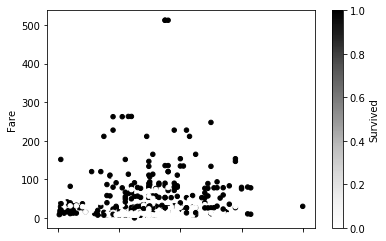

In [62]:
df.plot.scatter(x='Age', c='Survived', y='Fare')

In [63]:
x = df.drop('Survived',axis=1)
y = df.Survived

In [64]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
logreg.score(x_test,y_test)

0.835820895522388

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
logreg = LogisticRegression()
params = {'penalty':['l1','l2'],'max_iter':[100,200,300,400],'solver':['warn','liblinear','saga']}


grid = GridSearchCV(logreg,param_grid=params,cv=5)
grid.fit(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_iter': [100, 200, 300, 400],
                         'penalty': ['l1', 'l2'],
                         'solver': ['warn', 'liblinear', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [70]:
grid.best_params_

{'max_iter': 100, 'penalty': 'l2', 'solver': 'warn'}

In [71]:
grid.best_score_

0.819304152637486